In [2]:
# Import necessary libraries
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Normalize, Compose
from datasets import load_dataset
import numpy as np
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import IidPartitioner, DirichletPartitioner
from flwr.client import NumPyClient
from flwr.common import (
    Context, NDArrays, Scalar, ndarrays_to_parameters,
    parameters_to_ndarrays, EvaluateRes
)
from flwr.server import ServerApp, ServerConfig, ServerAppComponents
from flwr.server.strategy import FedProx
from flwr.simulation import run_simulation
from collections import OrderedDict
from typing import Dict, Tuple, List
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import cohen_kappa_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from flwr.server.client_proxy import ClientProxy
from flwr.common.logger import log
from logging import INFO

# Additional imports for plotting and data saving
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
from scipy.optimize import minimize

DEBUG 2024-11-24 16:34:49,304:     Asyncio event loop already running.
DEBUG 2024-11-24 16:34:49,305:     Logger propagate set to False
DEBUG 2024-11-24 16:34:49,306:     Pre-registering run with id 17253360979226869769
DEBUG 2024-11-24 16:34:49,306:     Using InMemoryState
DEBUG 2024-11-24 16:34:49,307:     Using InMemoryState
DEBUG 2024-11-24 16:34:49,308:     Buffer time delay: 5s
INFO 2024-11-24 16:34:49,311:      Starting Flower ServerApp, config: num_rounds=50, no round_timeout
INFO 2024-11-24 16:34:49,313:      
INFO 2024-11-24 16:34:49,313:      [INIT]
INFO 2024-11-24 16:34:49,314:      Using initial global parameters provided by strategy
INFO 2024-11-24 16:34:49,314:      Starting evaluation of initial global parameters
INFO 2024-11-24 16:34:49,314:      Evaluation returned no results (`None`)
INFO 2024-11-24 16:34:49,315:      
INFO 2024-11-24 16:34:49,315:      [ROUND 1]



Running Scenario: Baseline_IID


DEBUG 2024-11-24 16:34:54,310:     Using InMemoryState
DEBUG 2024-11-24 16:34:54,311:     Registered 5 nodes
DEBUG 2024-11-24 16:34:54,312:     Supported backends: ['ray']
DEBUG 2024-11-24 16:34:54,312:     Initialising: RayBackend
DEBUG 2024-11-24 16:34:54,313:     Backend config: {'init_args': {}, 'client_resources': {'num_cpus': 2, 'num_gpus': 0}, 'actor': {'tensorflow': 0}}
2024-11-24 16:34:55,259	INFO worker.py:1819 -- Started a local Ray instance.
INFO 2024-11-24 16:34:56,083:      configure_fit: strategy sampled 2 clients (out of 5)
DEBUG 2024-11-24 16:34:56,100:     Constructed ActorPool with: 16 actors
DEBUG 2024-11-24 16:34:56,101:     Using InMemoryState
(ClientAppActor pid=1447740) /home/fredrik/BTH/DV2607/part2/flower_env/lib/python3.12/site-packages/datasets/utils/_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
(ClientAppActor pid=1447740)   obj.co_lnotab,  # for < python 3.10 [not counted in args]
INFO 2024-11-24 16:35:06,224:      aggreg

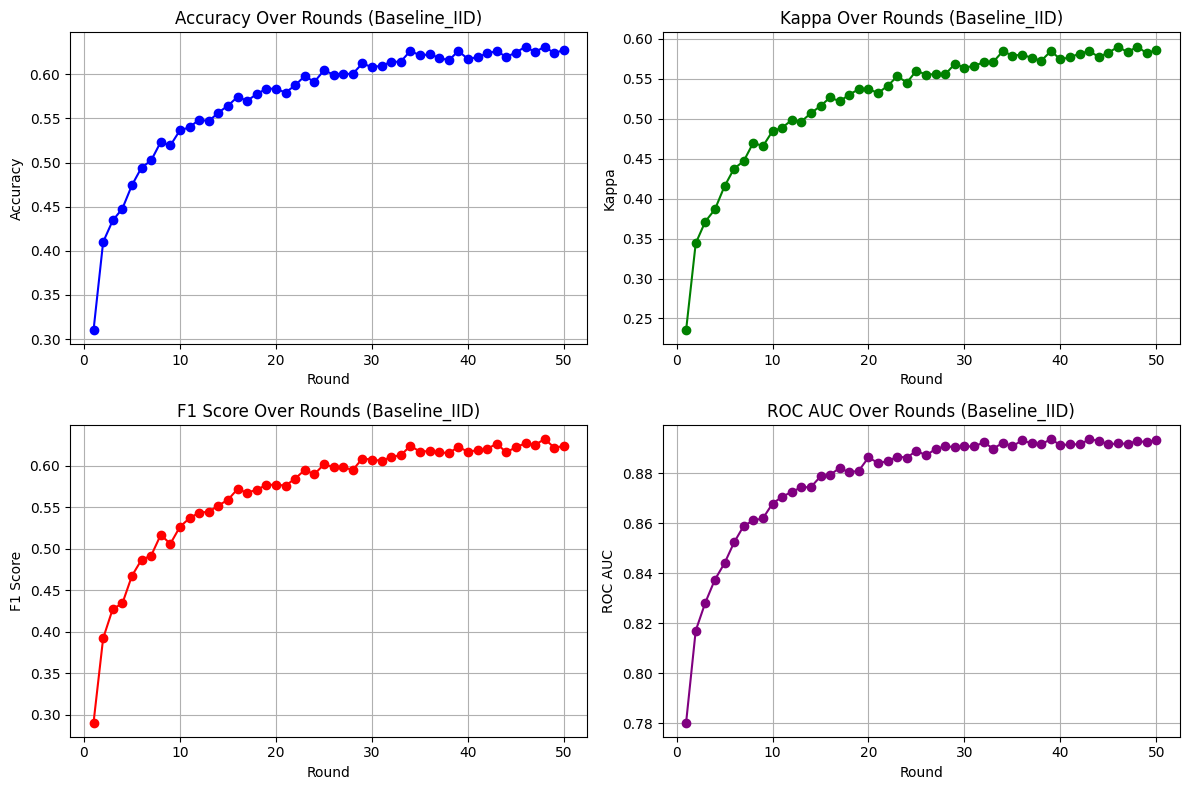

DEBUG 2024-11-24 16:41:33,213:     Asyncio event loop already running.
DEBUG 2024-11-24 16:41:33,213:     Logger propagate set to False
DEBUG 2024-11-24 16:41:33,214:     Pre-registering run with id 18037515852471988994
DEBUG 2024-11-24 16:41:33,215:     Using InMemoryState
DEBUG 2024-11-24 16:41:33,215:     Using InMemoryState
DEBUG 2024-11-24 16:41:33,217:     Buffer time delay: 5s
INFO 2024-11-24 16:41:33,219:      Starting Flower ServerApp, config: num_rounds=50, no round_timeout
INFO 2024-11-24 16:41:33,219:      
INFO 2024-11-24 16:41:33,220:      [INIT]
INFO 2024-11-24 16:41:33,220:      Using initial global parameters provided by strategy
INFO 2024-11-24 16:41:33,220:      Starting evaluation of initial global parameters
INFO 2024-11-24 16:41:33,220:      Evaluation returned no results (`None`)
INFO 2024-11-24 16:41:33,221:      
INFO 2024-11-24 16:41:33,221:      [ROUND 1]



Running Scenario: Baseline_NonIID


DEBUG 2024-11-24 16:41:38,218:     Using InMemoryState
DEBUG 2024-11-24 16:41:38,219:     Registered 5 nodes
DEBUG 2024-11-24 16:41:38,220:     Supported backends: ['ray']
DEBUG 2024-11-24 16:41:38,221:     Initialising: RayBackend
DEBUG 2024-11-24 16:41:38,221:     Backend config: {'init_args': {}, 'client_resources': {'num_cpus': 2, 'num_gpus': 0}, 'actor': {'tensorflow': 0}}
2024-11-24 16:41:39,192	INFO worker.py:1819 -- Started a local Ray instance.
INFO 2024-11-24 16:41:39,791:      configure_fit: strategy sampled 2 clients (out of 5)
DEBUG 2024-11-24 16:41:39,810:     Constructed ActorPool with: 16 actors
DEBUG 2024-11-24 16:41:39,811:     Using InMemoryState
(ClientAppActor pid=1456443) /home/fredrik/BTH/DV2607/part2/flower_env/lib/python3.12/site-packages/datasets/utils/_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
(ClientAppActor pid=1456443)   obj.co_lnotab,  # for < python 3.10 [not counted in args]
INFO 2024-11-24 16:41:50,716:      aggreg

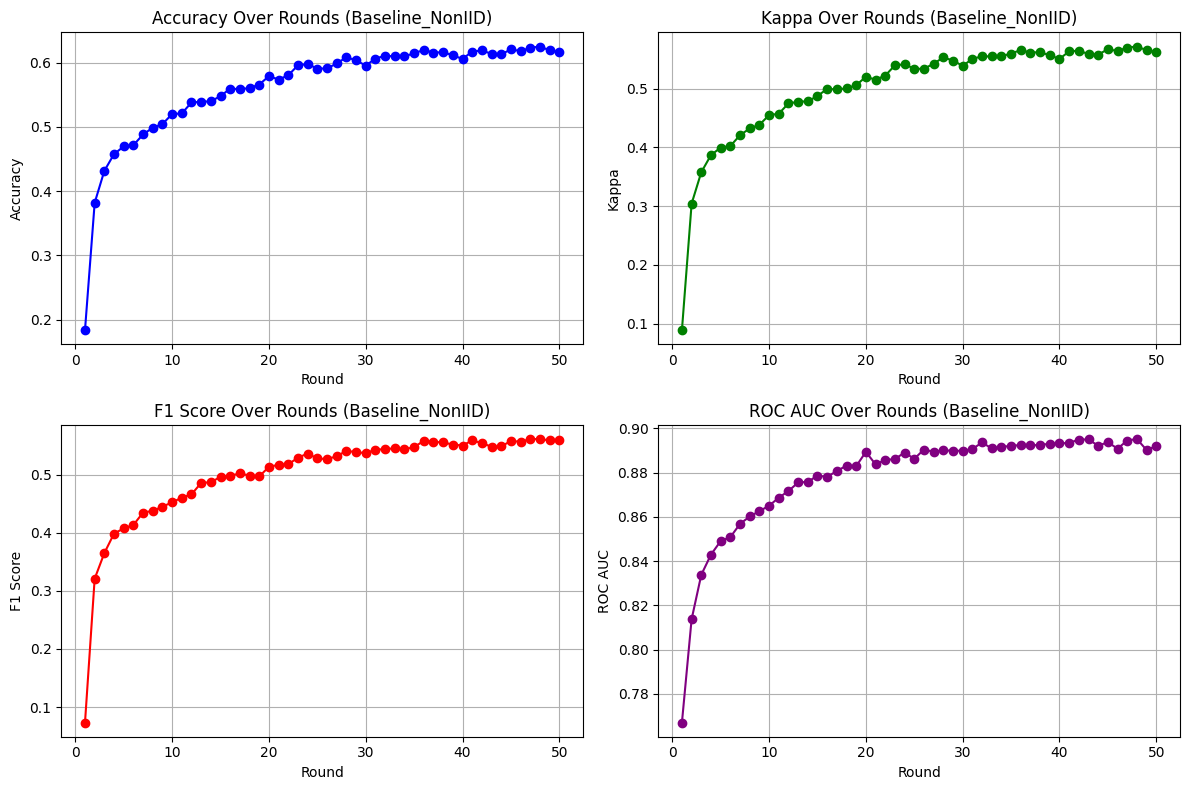

DEBUG 2024-11-24 16:48:41,827:     Asyncio event loop already running.
DEBUG 2024-11-24 16:48:41,828:     Logger propagate set to False
DEBUG 2024-11-24 16:48:41,828:     Pre-registering run with id 18037809152567737093
DEBUG 2024-11-24 16:48:41,829:     Using InMemoryState
DEBUG 2024-11-24 16:48:41,829:     Using InMemoryState
DEBUG 2024-11-24 16:48:41,831:     Buffer time delay: 5s
INFO 2024-11-24 16:48:41,834:      Starting Flower ServerApp, config: num_rounds=50, no round_timeout
INFO 2024-11-24 16:48:41,834:      
INFO 2024-11-24 16:48:41,835:      [INIT]
INFO 2024-11-24 16:48:41,835:      Using initial global parameters provided by strategy
INFO 2024-11-24 16:48:41,836:      Starting evaluation of initial global parameters
INFO 2024-11-24 16:48:41,836:      Evaluation returned no results (`None`)
INFO 2024-11-24 16:48:41,836:      
INFO 2024-11-24 16:48:41,836:      [ROUND 1]



Running Scenario: One_Attacker_IID


DEBUG 2024-11-24 16:48:46,832:     Using InMemoryState
DEBUG 2024-11-24 16:48:46,833:     Registered 5 nodes
DEBUG 2024-11-24 16:48:46,833:     Supported backends: ['ray']
DEBUG 2024-11-24 16:48:46,833:     Initialising: RayBackend
DEBUG 2024-11-24 16:48:46,834:     Backend config: {'init_args': {}, 'client_resources': {'num_cpus': 2, 'num_gpus': 0}, 'actor': {'tensorflow': 0}}
INFO 2024-11-24 16:48:47,836:      configure_fit: strategy sampled 2 clients (out of 5)
2024-11-24 16:48:48,790	INFO worker.py:1819 -- Started a local Ray instance.
DEBUG 2024-11-24 16:48:49,427:     Constructed ActorPool with: 16 actors
DEBUG 2024-11-24 16:48:49,428:     Using InMemoryState
(ClientAppActor pid=1465195) /home/fredrik/BTH/DV2607/part2/flower_env/lib/python3.12/site-packages/datasets/utils/_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
(ClientAppActor pid=1465195)   obj.co_lnotab,  # for < python 3.10 [not counted in args]
INFO 2024-11-24 16:49:00,036:      aggreg

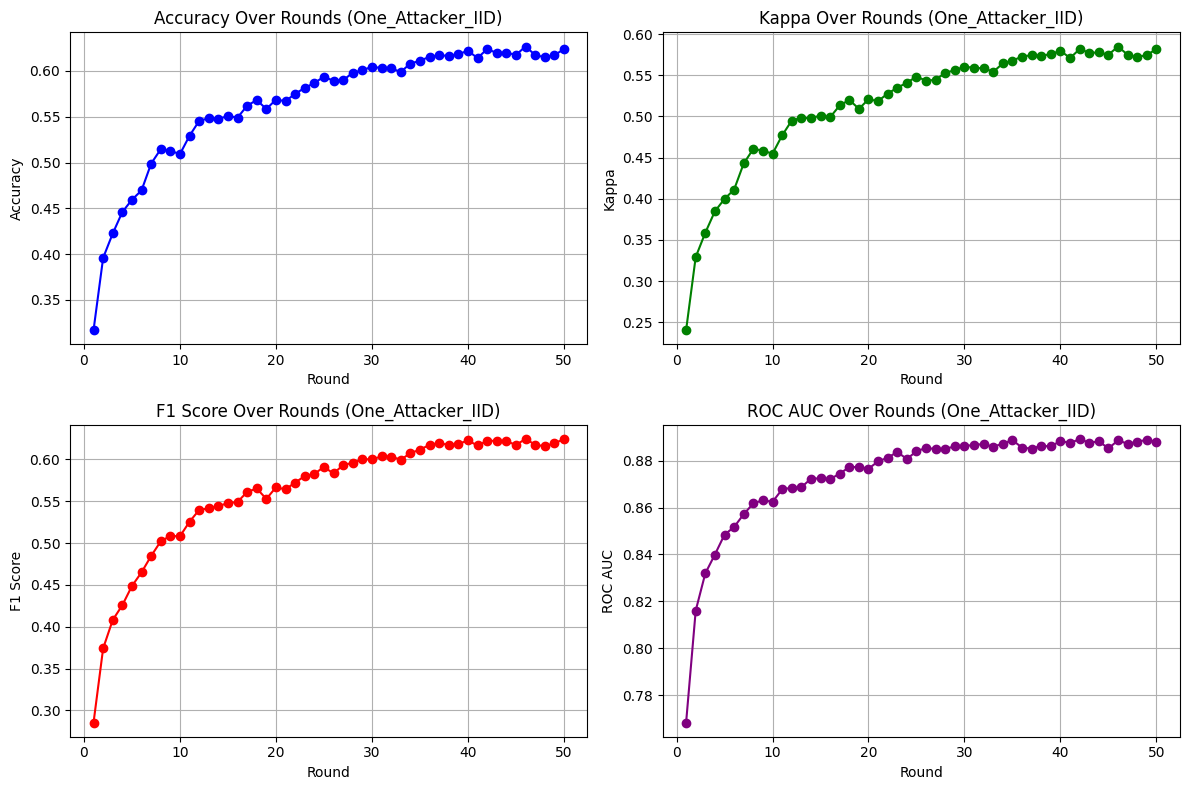

DEBUG 2024-11-24 16:55:26,664:     Asyncio event loop already running.
DEBUG 2024-11-24 16:55:26,664:     Logger propagate set to False
DEBUG 2024-11-24 16:55:26,665:     Pre-registering run with id 17870324531592035879
DEBUG 2024-11-24 16:55:26,666:     Using InMemoryState
DEBUG 2024-11-24 16:55:26,666:     Using InMemoryState
DEBUG 2024-11-24 16:55:26,668:     Buffer time delay: 5s
INFO 2024-11-24 16:55:26,671:      Starting Flower ServerApp, config: num_rounds=50, no round_timeout
INFO 2024-11-24 16:55:26,671:      
INFO 2024-11-24 16:55:26,672:      [INIT]
INFO 2024-11-24 16:55:26,672:      Using initial global parameters provided by strategy
INFO 2024-11-24 16:55:26,673:      Starting evaluation of initial global parameters
INFO 2024-11-24 16:55:26,673:      Evaluation returned no results (`None`)
INFO 2024-11-24 16:55:26,674:      
INFO 2024-11-24 16:55:26,674:      [ROUND 1]



Running Scenario: One_Attacker_NonIID


DEBUG 2024-11-24 16:55:31,670:     Using InMemoryState
DEBUG 2024-11-24 16:55:31,671:     Registered 5 nodes
DEBUG 2024-11-24 16:55:31,671:     Supported backends: ['ray']
DEBUG 2024-11-24 16:55:31,672:     Initialising: RayBackend
DEBUG 2024-11-24 16:55:31,672:     Backend config: {'init_args': {}, 'client_resources': {'num_cpus': 2, 'num_gpus': 0}, 'actor': {'tensorflow': 0}}
2024-11-24 16:55:32,626	INFO worker.py:1819 -- Started a local Ray instance.
INFO 2024-11-24 16:55:33,148:      configure_fit: strategy sampled 2 clients (out of 5)
DEBUG 2024-11-24 16:55:33,167:     Constructed ActorPool with: 16 actors
DEBUG 2024-11-24 16:55:33,168:     Using InMemoryState
(ClientAppActor pid=1473899) /home/fredrik/BTH/DV2607/part2/flower_env/lib/python3.12/site-packages/datasets/utils/_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
(ClientAppActor pid=1473899)   obj.co_lnotab,  # for < python 3.10 [not counted in args]
INFO 2024-11-24 16:55:43,773:      aggreg

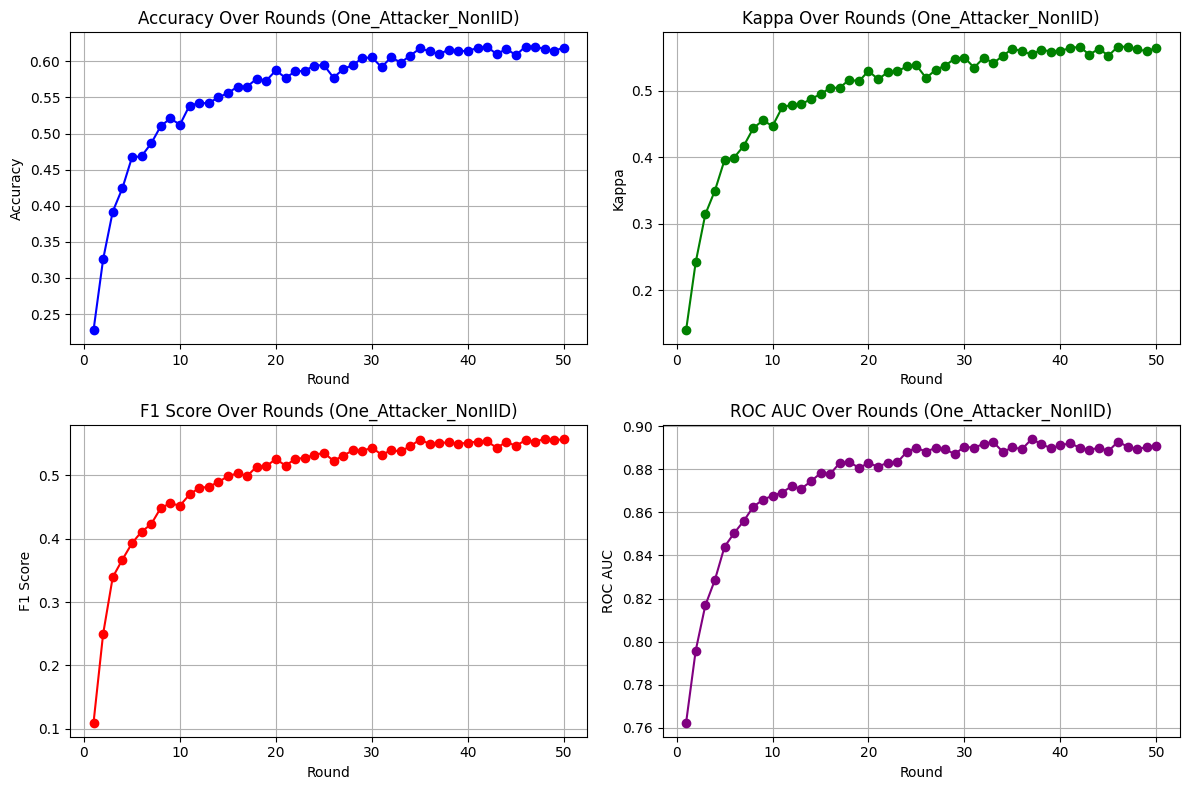

DEBUG 2024-11-24 17:02:45,111:     Asyncio event loop already running.
DEBUG 2024-11-24 17:02:45,112:     Logger propagate set to False
DEBUG 2024-11-24 17:02:45,113:     Pre-registering run with id 2515329556192482944
DEBUG 2024-11-24 17:02:45,114:     Using InMemoryState
DEBUG 2024-11-24 17:02:45,114:     Using InMemoryState
DEBUG 2024-11-24 17:02:45,115:     Buffer time delay: 5s
INFO 2024-11-24 17:02:45,118:      Starting Flower ServerApp, config: num_rounds=50, no round_timeout
INFO 2024-11-24 17:02:45,119:      
INFO 2024-11-24 17:02:45,119:      [INIT]
INFO 2024-11-24 17:02:45,120:      Using initial global parameters provided by strategy
INFO 2024-11-24 17:02:45,120:      Starting evaluation of initial global parameters
INFO 2024-11-24 17:02:45,121:      Evaluation returned no results (`None`)
INFO 2024-11-24 17:02:45,121:      
INFO 2024-11-24 17:02:45,121:      [ROUND 1]



Running Scenario: Two_Attackers_IID


DEBUG 2024-11-24 17:02:50,116:     Using InMemoryState
DEBUG 2024-11-24 17:02:50,117:     Registered 5 nodes
DEBUG 2024-11-24 17:02:50,118:     Supported backends: ['ray']
DEBUG 2024-11-24 17:02:50,118:     Initialising: RayBackend
DEBUG 2024-11-24 17:02:50,119:     Backend config: {'init_args': {}, 'client_resources': {'num_cpus': 2, 'num_gpus': 0}, 'actor': {'tensorflow': 0}}
2024-11-24 17:02:51,086	INFO worker.py:1819 -- Started a local Ray instance.
INFO 2024-11-24 17:02:51,639:      configure_fit: strategy sampled 2 clients (out of 5)
DEBUG 2024-11-24 17:02:51,651:     Constructed ActorPool with: 16 actors
DEBUG 2024-11-24 17:02:51,652:     Using InMemoryState
(ClientAppActor pid=1482661) /home/fredrik/BTH/DV2607/part2/flower_env/lib/python3.12/site-packages/datasets/utils/_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
(ClientAppActor pid=1482661)   obj.co_lnotab,  # for < python 3.10 [not counted in args]
INFO 2024-11-24 17:03:02,762:      aggreg

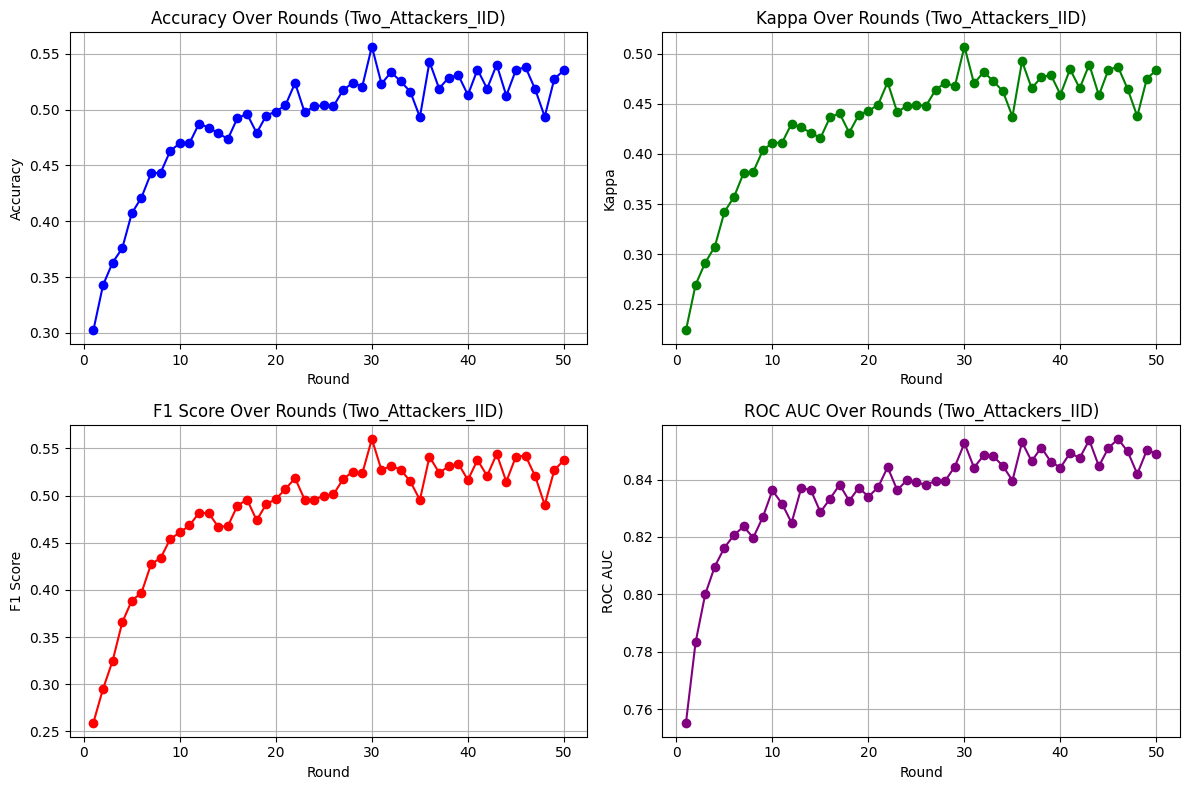

DEBUG 2024-11-24 17:09:38,877:     Asyncio event loop already running.
DEBUG 2024-11-24 17:09:38,877:     Logger propagate set to False
DEBUG 2024-11-24 17:09:38,878:     Pre-registering run with id 16125292253515601792
DEBUG 2024-11-24 17:09:38,879:     Using InMemoryState
DEBUG 2024-11-24 17:09:38,879:     Using InMemoryState
DEBUG 2024-11-24 17:09:38,880:     Buffer time delay: 5s
INFO 2024-11-24 17:09:38,883:      Starting Flower ServerApp, config: num_rounds=50, no round_timeout
INFO 2024-11-24 17:09:38,883:      
INFO 2024-11-24 17:09:38,884:      [INIT]
INFO 2024-11-24 17:09:38,884:      Using initial global parameters provided by strategy
INFO 2024-11-24 17:09:38,884:      Starting evaluation of initial global parameters
INFO 2024-11-24 17:09:38,885:      Evaluation returned no results (`None`)
INFO 2024-11-24 17:09:38,885:      
INFO 2024-11-24 17:09:38,885:      [ROUND 1]



Running Scenario: Two_Attackers_NonIID


DEBUG 2024-11-24 17:09:43,882:     Using InMemoryState
DEBUG 2024-11-24 17:09:43,882:     Registered 5 nodes
DEBUG 2024-11-24 17:09:43,883:     Supported backends: ['ray']
DEBUG 2024-11-24 17:09:43,883:     Initialising: RayBackend
DEBUG 2024-11-24 17:09:43,884:     Backend config: {'init_args': {}, 'client_resources': {'num_cpus': 2, 'num_gpus': 0}, 'actor': {'tensorflow': 0}}
INFO 2024-11-24 17:09:44,884:      configure_fit: strategy sampled 2 clients (out of 5)
2024-11-24 17:09:44,893	INFO worker.py:1819 -- Started a local Ray instance.
DEBUG 2024-11-24 17:09:45,418:     Constructed ActorPool with: 16 actors
DEBUG 2024-11-24 17:09:45,419:     Using InMemoryState
(ClientAppActor pid=1491379) /home/fredrik/BTH/DV2607/part2/flower_env/lib/python3.12/site-packages/datasets/utils/_dill.py:385: DeprecationWarning: co_lnotab is deprecated, use co_lines instead.
(ClientAppActor pid=1491379)   obj.co_lnotab,  # for < python 3.10 [not counted in args]
INFO 2024-11-24 17:09:56,324:      aggreg

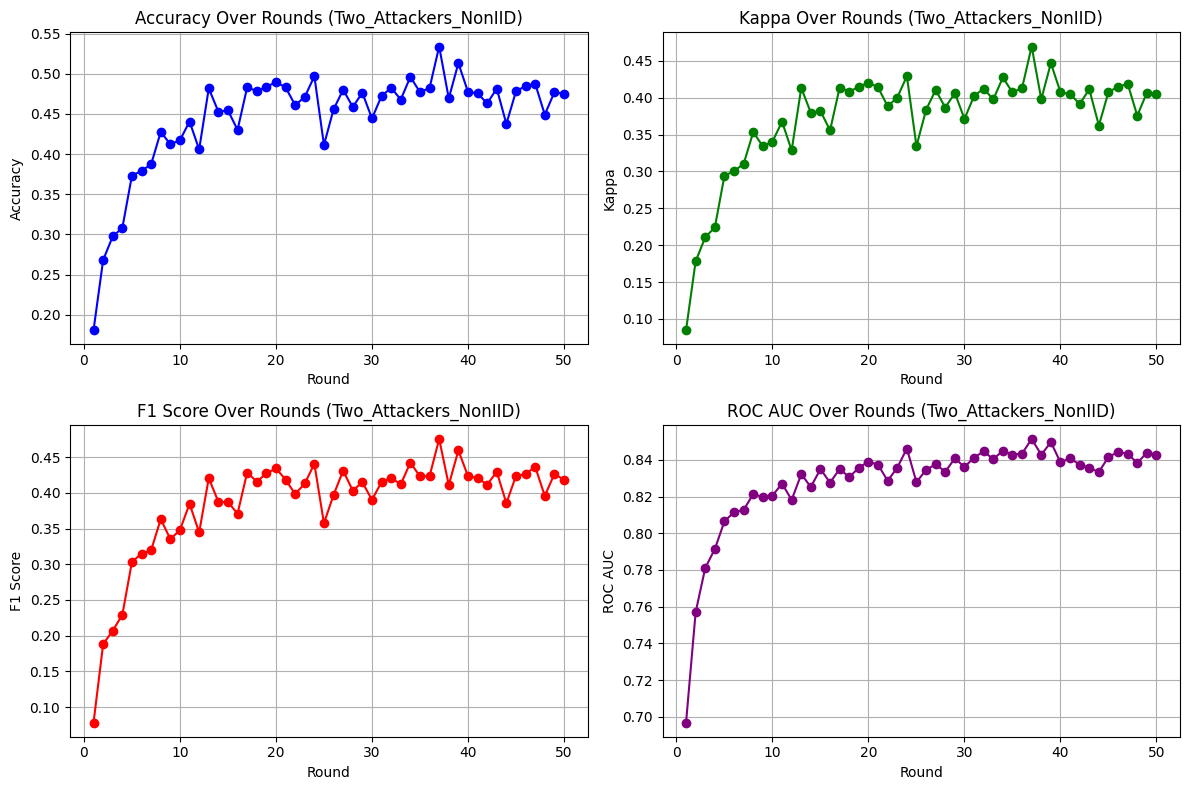

In [ ]:
# Set random seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed()

# Define constants
NUM_CLIENTS = 5
NUM_ROUNDS = 50
BATCH_SIZE = 32

# Function to run simulation for a given scenario
def run_simulation_scenario(ATTACKER_IDS, USE_IID):
    # Initialize metrics lists
    rounds_list = []
    accuracy_list = []
    kappa_list = []
    f1_list = []
    roc_auc_list = []

    # Define partitioner based on IID or non-IID
    if USE_IID:
        # IID Partitioning
        partitioner = IidPartitioner(num_partitions=NUM_CLIENTS)
    else:
        # Non-IID Partitioning using Dirichlet distribution
        alpha = 1.0  # Adjust alpha for desired heterogeneity
        partitioner = DirichletPartitioner(num_partitions=NUM_CLIENTS, alpha=alpha, partition_by="label")

    # Load the CIFAR-10 dataset and partition it
    fds = FederatedDataset(dataset="cifar10", partitioners={"train": partitioner})

    def get_cifar10_dataloaders(cifar10_dataset, batch_size: int):
        """
        Function to handle CIFAR-10 data loaders.
        Applies appropriate transformations for CIFAR-10 images.
        """
        # CIFAR-10 normalization parameters
        pytorch_transforms = Compose([
            ToTensor(),
            Normalize((0.4914, 0.4822, 0.4465),
                      (0.2023, 0.1994, 0.2010)),
        ])

        # Prepare transformation functions
        def apply_transforms(batch):
            """Apply transforms to the partition from FederatedDataset."""
            batch["img"] = [pytorch_transforms(img) for img in batch["img"]]
            return batch

        cifar10_dataset = cifar10_dataset.with_transform(apply_transforms)

        # Construct PyTorch dataloader
        dataloader = DataLoader(cifar10_dataset, batch_size=batch_size, shuffle=True)
        return dataloader

    # Define the neural network model suitable for CIFAR-10
    class Net(nn.Module):
        def __init__(self, num_classes: int) -> None:
            super(Net, self).__init__()
            self.conv1 = nn.Conv2d(3, 6, 5)  # Input channels adjusted for CIFAR-10
            self.pool = nn.MaxPool2d(2, 2)
            self.conv2 = nn.Conv2d(6, 16, 5)
            self.fc1 = nn.Linear(16 * 5 * 5, 120)
            self.fc2 = nn.Linear(120, 84)
            self.fc3 = nn.Linear(84, num_classes)

        def forward(self, x: torch.Tensor) -> torch.Tensor:
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            x = x.view(-1, 16 * 5 * 5)
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc3(x)
            return x

    # Functions to set and get model parameters
    def set_params(model, parameters):
        """Replace model parameters with those passed as parameters."""
        params_dict = zip(model.state_dict().keys(), parameters)
        state_dict = OrderedDict({k: torch.from_numpy(v) for k, v in params_dict})
        model.load_state_dict(state_dict, strict=True)

    def get_params(model):
        """Extract model parameters as a list of NumPy arrays."""
        return [val.cpu().numpy() for _, val in model.state_dict().items()]

    # Training function with label flipping for attackers and proximal term
    def train(net, trainloader, optimizer, device="cpu", is_attacker=False, global_params=None, mu=0.1):
        """Train the network on the training set with optional proximal term."""
        criterion = torch.nn.CrossEntropyLoss()
        net.to(device)
        net.train()
        for batch in trainloader:
            images, labels = batch["img"].to(device), batch["label"].to(device)
            optimizer.zero_grad()
            if is_attacker:
                # Flip labels for attackers (simple label flipping)
                labels = (labels + 1) % 10
            outputs = net(images)
            loss = criterion(outputs, labels)
            if global_params is not None:
                # Add proximal term
                proximal_loss = 0.0
                for param, global_param in zip(net.parameters(), global_params.values()):
                    proximal_loss += torch.norm(param - global_param.to(device))**2
                loss += (mu / 2) * proximal_loss
            loss.backward()
            optimizer.step()

    # Testing function with metric calculations
    def test(net, testloader, device):
        """Validate the network on the entire test set."""
        criterion = torch.nn.CrossEntropyLoss()
        net.to(device)
        net.eval()
        correct, loss = 0, 0.0
        all_preds = []
        all_labels = []
        all_outputs = []
        with torch.no_grad():
            for batch in testloader:
                images, labels = batch["img"].to(device), batch["label"].to(device)
                outputs = net(images)
                loss += criterion(outputs, labels).item()
                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_outputs.extend(outputs.cpu().numpy())
        accuracy = correct / len(testloader.dataset)

        # Compute metrics
        kappa = cohen_kappa_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds, average='macro')

        # Check if there are at least two classes in y_true
        unique_classes = np.unique(all_labels)
        if len(unique_classes) > 1:
            try:
                all_labels_bin = label_binarize(all_labels, classes=list(range(10)))
                all_outputs_array = np.array(all_outputs)
                roc_auc = roc_auc_score(all_labels_bin, all_outputs_array, average='macro', multi_class='ovr')
            except ValueError:
                roc_auc = float('nan')  # Assign NaN if ROC AUC cannot be computed
        else:
            roc_auc = float('nan')  # Assign NaN if only one class is present

        metrics = {
            "accuracy": accuracy,
            "kappa": kappa,
            "f1_score": f1,
            "roc_auc": roc_auc,
        }
        return loss, accuracy, metrics

    # Define the FlowerClient class
    class FlowerClient(NumPyClient):
        def __init__(self, trainloader, valloader, is_attacker=False) -> None:
            super().__init__()
            self.trainloader = trainloader
            self.valloader = valloader
            self.model = Net(num_classes=10)
            self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
            self.is_attacker = is_attacker

        def fit(self, parameters, config):
            """Train the model locally with FedProx proximal term."""
            # Set model parameters
            set_params(self.model, parameters)

            # Extract global parameters from config
            global_params = OrderedDict(
                (k, torch.tensor(v)) for k, v in zip(self.model.state_dict().keys(), parameters)
            )

            # Get proximal_mu from config
            mu = config.get("proximal_mu", 0.1)  # Default to 0.1 if not set

            # Define the optimizer
            optim = torch.optim.SGD(self.model.parameters(), lr=0.01, momentum=0.9)

            # Train the model with proximal term
            train(
                self.model,
                self.trainloader,
                optim,
                self.device,
                is_attacker=self.is_attacker,
                global_params=global_params,
                mu=mu  # Proximal term coefficient
            )

            # Return updated parameters (full model parameters)
            return get_params(self.model), len(self.trainloader.dataset), {}

        def evaluate(self, parameters: NDArrays, config: Dict[str, Scalar]):
            """Evaluate the model locally."""
            set_params(self.model, parameters)
            loss, accuracy, metrics = test(self.model, self.valloader, self.device)
            return float(loss), len(self.valloader.dataset), metrics

    # Define the client function
    def client_fn(context: Context):
        """Create a Flower client representing a participant in the federated learning."""
        partition_id = int(context.node_config["partition-id"])
        partition = fds.load_partition(partition_id, "train")
        # Partition into train/validation
        partition_train_val = partition.train_test_split(test_size=0.1, seed=42)
        # Get dataloaders
        trainloader = get_cifar10_dataloaders(partition_train_val["train"], batch_size=BATCH_SIZE)
        valloader = get_cifar10_dataloaders(partition_train_val["test"], batch_size=BATCH_SIZE)
        # Determine if the client is an attacker
        is_attacker = partition_id in ATTACKER_IDS
        return FlowerClient(trainloader=trainloader, valloader=valloader, is_attacker=is_attacker).to_client()

    # Define function to provide fit config with proximal_mu
    def fit_config(rnd: int):
        """Return training configuration dict for each round."""
        return {"proximal_mu": 0.1}  # Set proximal_mu value

    # Define custom strategy to log metrics
    class CustomFedProx(FedProx):
        def __init__(self, *args, **kwargs):
            self.rounds_list = kwargs.pop('rounds_list')
            self.accuracy_list = kwargs.pop('accuracy_list')
            self.kappa_list = kwargs.pop('kappa_list')
            self.f1_list = kwargs.pop('f1_list')
            self.roc_auc_list = kwargs.pop('roc_auc_list')
            proximal_mu = kwargs.pop('proximal_mu', 0.1)  # Extract proximal_mu
            super().__init__(*args, proximal_mu=proximal_mu, **kwargs)  # Pass proximal_mu to FedProx
            self.parameters = kwargs.get('initial_parameters', None)

        def aggregate_evaluate(
            self,
            rnd: int,
            results: List[Tuple[ClientProxy, EvaluateRes]],
            failures: List[BaseException],
        ):
            """Aggregate evaluation results using weighted average and log metrics per round."""
            if not results:
                return None, {}

            # Use weighted average to aggregate metrics
            num_examples_total = sum([r[1].num_examples for r in results])

            # Initialize sums
            accuracy_sum = 0.0
            kappa_sum = 0.0
            f1_sum = 0.0
            roc_auc_sum = 0.0
            roc_auc_weight = 0

            for _, evaluate_res in results:
                accuracy_sum += evaluate_res.metrics.get("accuracy", 0.0) * evaluate_res.num_examples
                kappa_sum += evaluate_res.metrics.get("kappa", 0.0) * evaluate_res.num_examples
                f1_sum += evaluate_res.metrics.get("f1_score", 0.0) * evaluate_res.num_examples
                roc_auc = evaluate_res.metrics.get("roc_auc", float('nan'))
                if not np.isnan(roc_auc):
                    roc_auc_sum += roc_auc * evaluate_res.num_examples
                    roc_auc_weight += evaluate_res.num_examples

            # Compute weighted averages
            accuracy = accuracy_sum / num_examples_total
            kappa = kappa_sum / num_examples_total
            f1 = f1_sum / num_examples_total
            roc_auc = roc_auc_sum / roc_auc_weight if roc_auc_weight > 0 else float('nan')

            # Log metrics
            log(INFO, f"Round {rnd} evaluation metrics:")
            log(INFO, f"Accuracy: {accuracy:.4f}")
            log(INFO, f"Kappa: {kappa:.4f}")
            log(INFO, f"F1 Score: {f1:.4f}")
            if not np.isnan(roc_auc):
                log(INFO, f"ROC AUC: {roc_auc:.4f}")
            else:
                log(INFO, f"ROC AUC: Undefined (only one class present in y_true)")

            # Store metrics
            self.rounds_list.append(rnd)
            self.accuracy_list.append(accuracy)
            self.kappa_list.append(kappa)
            self.f1_list.append(f1)
            self.roc_auc_list.append(roc_auc if not np.isnan(roc_auc) else 0.0)

            # Return aggregated loss and metrics
            return super().aggregate_evaluate(rnd, results, failures)

    # Define the custom Geometric Median FedProx strategy
    class GeometricMedianFedProx(CustomFedProx):
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)

        def aggregate_fit(
            self,
            rnd: int,
            results: List[Tuple[ClientProxy, EvaluateRes]],
            failures: List[BaseException],
        ):
            if not results:
                return None, {}

            # Extract client updates
            weights = [parameters_to_ndarrays(fit_res.parameters) for _, fit_res in results]

            # Compute the geometric median of the weights
            aggregated_weights = self.geometric_median(weights)

            # Convert the aggregated weights back to Parameters
            aggregated_parameters = ndarrays_to_parameters(aggregated_weights)

            # Update the global parameters
            self.parameters = aggregated_parameters

            # Return the aggregated parameters and empty metrics dict
            return self.parameters, {}

        def geometric_median(self, points, eps=1e-5, max_iter=100):
            """Compute the geometric median of a set of points."""
            median = [np.mean([point[i] for point in points], axis=0) for i in range(len(points[0]))]
            for _ in range(max_iter):
                prev_median = median.copy()
                distances = [sum(np.linalg.norm(point[i] - median[i]) for i in range(len(point))) for point in points]
                distances = np.array(distances)
                # Avoid division by zero
                distances = np.maximum(distances, eps)
                weights = 1 / distances
                weights /= weights.sum()
                for i in range(len(median)):
                    median[i] = sum(w * point[i] for w, point in zip(weights, points))
                # Check for convergence
                diff = sum(np.linalg.norm(median[i] - prev_median[i]) for i in range(len(median)))
                if diff < eps:
                    break
            return median

    # Define the server function
    def server_fn(context: Context):
        # Instantiate the model
        model = Net(num_classes=10)
        ndarrays = get_params(model)
        # Convert model parameters to flwr.common.Parameters
        global_model_init = ndarrays_to_parameters(ndarrays)

        # Create the custom Geometric Median FedProx strategy
        strategy = GeometricMedianFedProx(
            fraction_fit=1.0,        # All clients participate in training
            fraction_evaluate=1.0,   # All clients participate in evaluation
            initial_parameters=global_model_init,  # Initialized global model
            rounds_list=rounds_list,
            accuracy_list=accuracy_list,
            kappa_list=kappa_list,
            f1_list=f1_list,
            roc_auc_list=roc_auc_list,
            proximal_mu=0.1,  # Proximal term coefficient for FedProx
            on_fit_config_fn=fit_config,  # Function to provide fit config
        )

        # Construct ServerConfig
        config = ServerConfig(num_rounds=NUM_ROUNDS)

        # Wrap everything into a ServerAppComponents object
        return ServerAppComponents(strategy=strategy, config=config)

    # Create your ServerApp and ClientApp
    server_app = ServerApp(server_fn=server_fn)
    from flwr.client import ClientApp
    client_app = ClientApp(
        client_fn=client_fn,
    )

    # Run the simulation
    run_simulation(
        server_app=server_app,
        client_app=client_app,
        num_supernodes=NUM_CLIENTS,
        backend_name="ray",
        verbose_logging=True,
    )

    # After the simulation, collect the metrics
    metrics = {
        "rounds": rounds_list,
        "accuracy": accuracy_list,
        "kappa": kappa_list,
        "f1_score": f1_list,
        "roc_auc": roc_auc_list,
    }

    return metrics

# Function to run all scenarios
def run_all_scenarios():
    scenarios = [
        # Scenarios without Attackers (Baseline)
        {"name": "Baseline_IID", "ATTACKER_IDS": [], "USE_IID": True},
        {"name": "Baseline_NonIID", "ATTACKER_IDS": [], "USE_IID": False},
        
        # Scenarios with One Attacker
        {"name": "One_Attacker_IID", "ATTACKER_IDS": [0], "USE_IID": True},
        {"name": "One_Attacker_NonIID", "ATTACKER_IDS": [0], "USE_IID": False},
        
        # Scenarios with Two Attackers
        {"name": "Two_Attackers_IID", "ATTACKER_IDS": [0, 1], "USE_IID": True},
        {"name": "Two_Attackers_NonIID", "ATTACKER_IDS": [0, 1], "USE_IID": False},
    ]

    results = {}

    for scenario in scenarios:
        print(f"\nRunning Scenario: {scenario['name']}")
        ATTACKER_IDS = scenario["ATTACKER_IDS"]
        USE_IID = scenario["USE_IID"]
        metrics = run_simulation_scenario(ATTACKER_IDS, USE_IID)
        results[scenario['name']] = metrics

        # Plot the metrics
        plt.figure(figsize=(12, 8))

        plt.subplot(2, 2, 1)
        plt.plot(metrics["rounds"], metrics["accuracy"], marker='o', color='blue')
        plt.title(f"Accuracy Over Rounds ({scenario['name']})")
        plt.xlabel('Round')
        plt.ylabel('Accuracy')
        plt.grid(True)

        plt.subplot(2, 2, 2)
        plt.plot(metrics["rounds"], metrics["kappa"], marker='o', color='green')
        plt.title(f"Kappa Over Rounds ({scenario['name']})")
        plt.xlabel('Round')
        plt.ylabel('Kappa')
        plt.grid(True)

        plt.subplot(2, 2, 3)
        plt.plot(metrics["rounds"], metrics["f1_score"], marker='o', color='red')
        plt.title(f"F1 Score Over Rounds ({scenario['name']})")
        plt.xlabel('Round')
        plt.ylabel("F1 Score")
        plt.grid(True)

        plt.subplot(2, 2, 4)
        plt.plot(metrics["rounds"], metrics["roc_auc"], marker='o', color='purple')
        plt.title(f"ROC AUC Over Rounds ({scenario['name']})")
        plt.xlabel('Round')
        plt.ylabel("ROC AUC")
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # Save metrics to CSV
        df = pd.DataFrame(metrics)
        df.to_csv(f"FedProx_Geometric_Median_Defense_{scenario['name']}_metrics.csv", index=False)

    return results

# Run all scenarios
results = run_all_scenarios()


In [2]:
# Define the list of scenarios
scenarios = [
    "Baseline_IID",
    "One_Attacker_IID",
    "Two_Attackers_IID",
    "Baseline_NonIID",
    "One_Attacker_NonIID",
    "Two_Attackers_NonIID",
]

# Initialize a dictionary to store DataFrames
dataframes = {}

# Load each CSV file into a DataFrame
for scenario in scenarios:
    filename = f"FedProx_Geometric_Median_Defense_{scenario}_metrics.csv"
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        dataframes[scenario] = df
        print(f"Loaded {filename} successfully.")
    else:
        print(f"Warning: {filename} does not exist and will be skipped.")

# Verify the loaded data
for scenario, df in dataframes.items():
    print(f"\nFirst few rows for FedProx Geometric Median Defense {scenario}:")
    display(df.head())


Loaded FedProx_Geometric_Median_Defense_Baseline_IID_metrics.csv successfully.
Loaded FedProx_Geometric_Median_Defense_One_Attacker_IID_metrics.csv successfully.
Loaded FedProx_Geometric_Median_Defense_Two_Attackers_IID_metrics.csv successfully.
Loaded FedProx_Geometric_Median_Defense_Baseline_NonIID_metrics.csv successfully.
Loaded FedProx_Geometric_Median_Defense_One_Attacker_NonIID_metrics.csv successfully.
Loaded FedProx_Geometric_Median_Defense_Two_Attackers_NonIID_metrics.csv successfully.

First few rows for FedProx Geometric Median Defense Baseline_IID:


,rounds,accuracy,kappa,f1_score,roc_auc
0,1,0.3102,0.235488,0.290791,0.780331
1,2,0.4100,0.344070,0.392321,0.817039
2,3,0.4344,0.371381,0.427692,0.828247
3,4,0.4478,0.386558,0.434273,0.837438
4,5,0.4744,0.415536,0.467597,0.843977



First few rows for FedProx Geometric Median Defense One_Attacker_IID:


,rounds,accuracy,kappa,f1_score,roc_auc
0,1,0.3172,0.240539,0.285513,0.768264
1,2,0.3960,0.329187,0.374217,0.816049
2,3,0.4226,0.358735,0.408062,0.831936
3,4,0.4460,0.384736,0.425746,0.839968
4,5,0.4594,0.399709,0.448671,0.848442



First few rows for FedProx Geometric Median Defense Two_Attackers_IID:


,rounds,accuracy,kappa,f1_score,roc_auc
0,1,0.3026,0.224500,0.259462,0.755423
1,2,0.3428,0.269603,0.295200,0.783339
2,3,0.3630,0.291556,0.324855,0.800030
3,4,0.3758,0.307541,0.365579,0.809708
4,5,0.4072,0.342094,0.388791,0.816273



First few rows for FedProx Geometric Median Defense Baseline_NonIID:


,rounds,accuracy,kappa,f1_score,roc_auc
0,1,0.183890,0.088901,0.073257,0.767076
1,2,0.381971,0.304106,0.321076,0.813773
2,3,0.431741,0.357655,0.365288,0.833861
3,4,0.457725,0.386828,0.398793,0.842984
4,5,0.469718,0.399499,0.407775,0.849103



First few rows for FedProx Geometric Median Defense One_Attacker_NonIID:


,rounds,accuracy,kappa,f1_score,roc_auc
0,1,0.227863,0.140080,0.110016,0.762459
1,2,0.326004,0.242093,0.249988,0.795872
2,3,0.391965,0.314116,0.339261,0.816812
3,4,0.424146,0.349773,0.366851,0.828667
4,5,0.466920,0.395614,0.392669,0.844013



First few rows for FedProx Geometric Median Defense Two_Attackers_NonIID:


,rounds,accuracy,kappa,f1_score,roc_auc
0,1,0.181091,0.084890,0.078417,0.696815
1,2,0.268239,0.178191,0.188299,0.756975
2,3,0.297621,0.210662,0.206893,0.781074
3,4,0.308215,0.224100,0.229259,0.791404
4,5,0.373376,0.294192,0.303453,0.806521


In [ ]:
# Combine all DataFrames into a single DataFrame for easier comparison
combined_df = pd.DataFrame()

for scenario, df in dataframes.items():
    temp_df = df.copy()
    temp_df['Scenario'] = scenario
    combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

output_file = "FedProx_Geometric_Median_Defense_combined_metrics.csv"
combined_df.to_csv(output_file, index=False)

# Display the combined DataFrame
print("Combined DataFrame:")
display(combined_df.head())


Combined DataFrame:


,rounds,accuracy,kappa,f1_score,roc_auc,Scenario
0,1,0.3102,0.235488,0.290791,0.780331,Baseline_IID
1,2,0.4100,0.344070,0.392321,0.817039,Baseline_IID
2,3,0.4344,0.371381,0.427692,0.828247,Baseline_IID
3,4,0.4478,0.386558,0.434273,0.837438,Baseline_IID
4,5,0.4744,0.415536,0.467597,0.843977,Baseline_IID


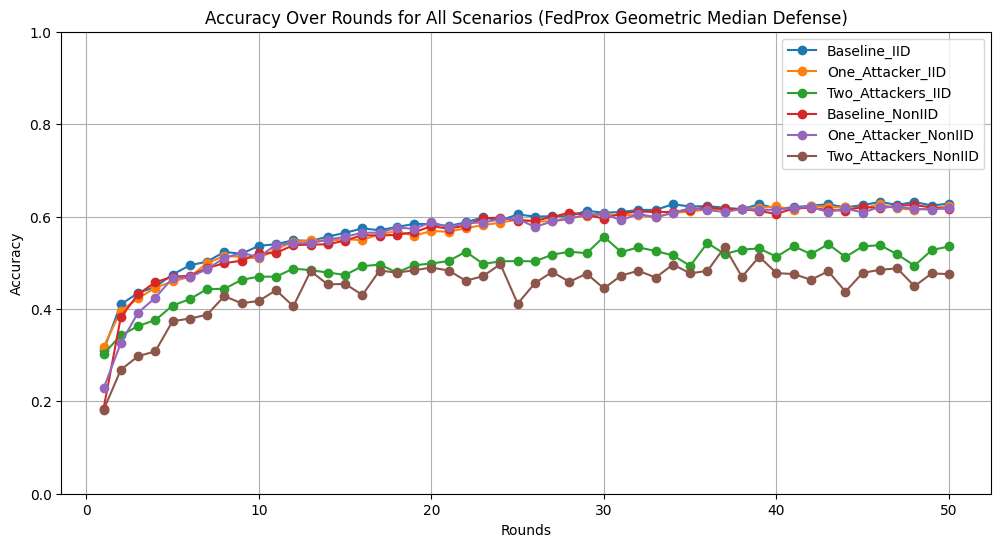

In [4]:
# Plot Accuracy Over Rounds for All Scenarios
plt.figure(figsize=(12, 6))

for scenario in scenarios:
    if scenario in dataframes:
        df = dataframes[scenario]
        plt.plot(df['rounds'], df['accuracy'], marker='o', label=scenario)

plt.title('Accuracy Over Rounds for All Scenarios (FedProx Geometric Median Defense)')
plt.xlabel('Rounds')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


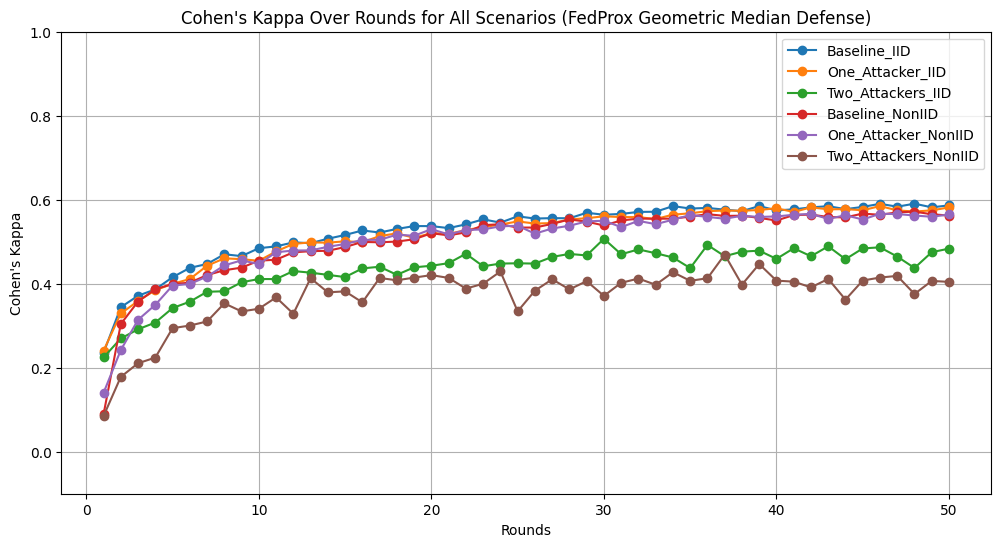

In [5]:
# Plot Cohen's Kappa Over Rounds for All Scenarios
plt.figure(figsize=(12, 6))

for scenario in scenarios:
    if scenario in dataframes:
        df = dataframes[scenario]
        plt.plot(df['rounds'], df['kappa'], marker='o', label=scenario)

plt.title("Cohen's Kappa Over Rounds for All Scenarios (FedProx Geometric Median Defense)")
plt.xlabel('Rounds')
plt.ylabel('Cohen\'s Kappa')
plt.ylim(-0.1, 1)
plt.grid(True)
plt.legend()
plt.show()


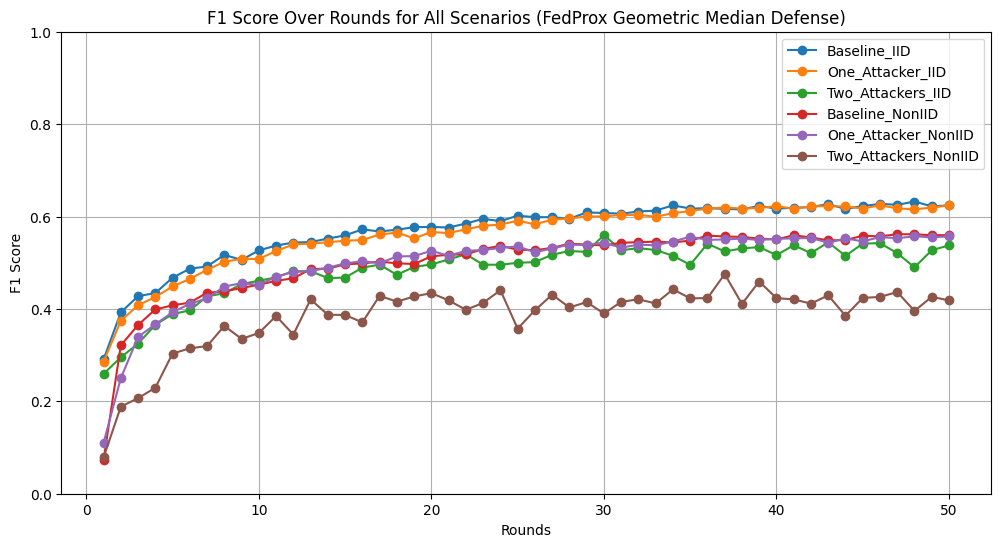

In [6]:
# Plot F1 Score Over Rounds for All Scenarios
plt.figure(figsize=(12, 6))

for scenario in scenarios:
    if scenario in dataframes:
        df = dataframes[scenario]
        plt.plot(df['rounds'], df['f1_score'], marker='o', label=scenario)

plt.title('F1 Score Over Rounds for All Scenarios (FedProx Geometric Median Defense)')
plt.xlabel('Rounds')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


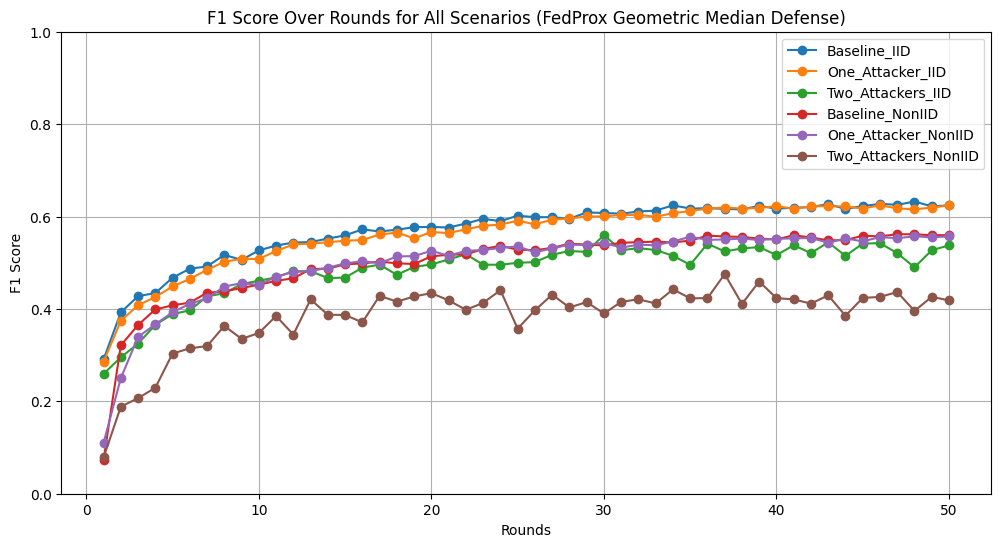

In [7]:
# Plot F1 Score Over Rounds for All Scenarios
plt.figure(figsize=(12, 6))

for scenario in scenarios:
    if scenario in dataframes:
        df = dataframes[scenario]
        plt.plot(df['rounds'], df['f1_score'], marker='o', label=scenario)

plt.title('F1 Score Over Rounds for All Scenarios (FedProx Geometric Median Defense)')
plt.xlabel('Rounds')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


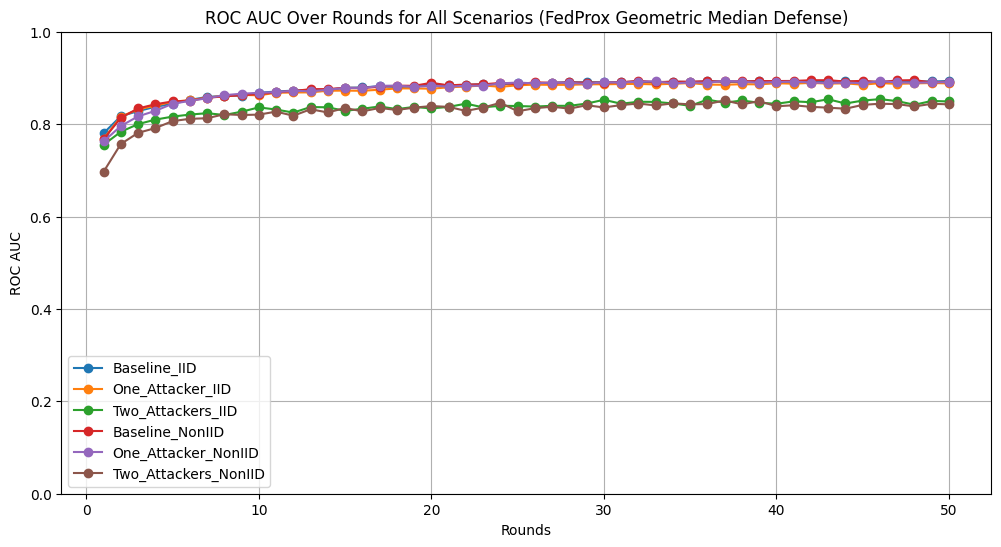

In [8]:
# Plot ROC AUC Over Rounds for All Scenarios
plt.figure(figsize=(12, 6))

for scenario in scenarios:
    if scenario in dataframes:
        df = dataframes[scenario]
        plt.plot(df['rounds'], df['roc_auc'], marker='o', label=scenario)

plt.title('ROC AUC Over Rounds for All Scenarios (FedProx Geometric Median Defense)')
plt.xlabel('Rounds')
plt.ylabel('ROC AUC')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()


In [9]:
# Create a summary table of final metrics for all scenarios
summary_metrics = []

for scenario in scenarios:
    if scenario in dataframes:
        df = dataframes[scenario]
        final_round = df['rounds'].max()
        final_metrics = df[df['rounds'] == final_round].iloc[0]
        summary_metrics.append({
            'Scenario': scenario,
            'Final Round': final_round,
            'Accuracy': final_metrics['accuracy'],
            'Kappa': final_metrics['kappa'],
            'F1 Score': final_metrics['f1_score'],
            'ROC AUC': final_metrics['roc_auc']
        })

# Create a DataFrame for the summary
summary_df = pd.DataFrame(summary_metrics)

# Display the summary table
print("Summary of Final Metrics for All Scenarios (FedProx Geometric Median Defense):")
display(summary_df)


Summary of Final Metrics for All Scenarios (FedProx Geometric Median Defense):


,Scenario,Final Round,Accuracy,Kappa,F1 Score,ROC AUC
0,Baseline_IID,50,0.628000,0.586573,0.624017,0.893261
1,One_Attacker_IID,50,0.623600,0.581626,0.623976,0.888095
2,Two_Attackers_IID,50,0.535200,0.483575,0.537651,0.849038
3,Baseline_NonIID,50,0.616430,0.562348,0.559759,0.892059
4,One_Attacker_NonIID,50,0.619228,0.564845,0.557144,0.890932
5,Two_Attackers_NonIID,50,0.475315,0.404407,0.418284,0.842864


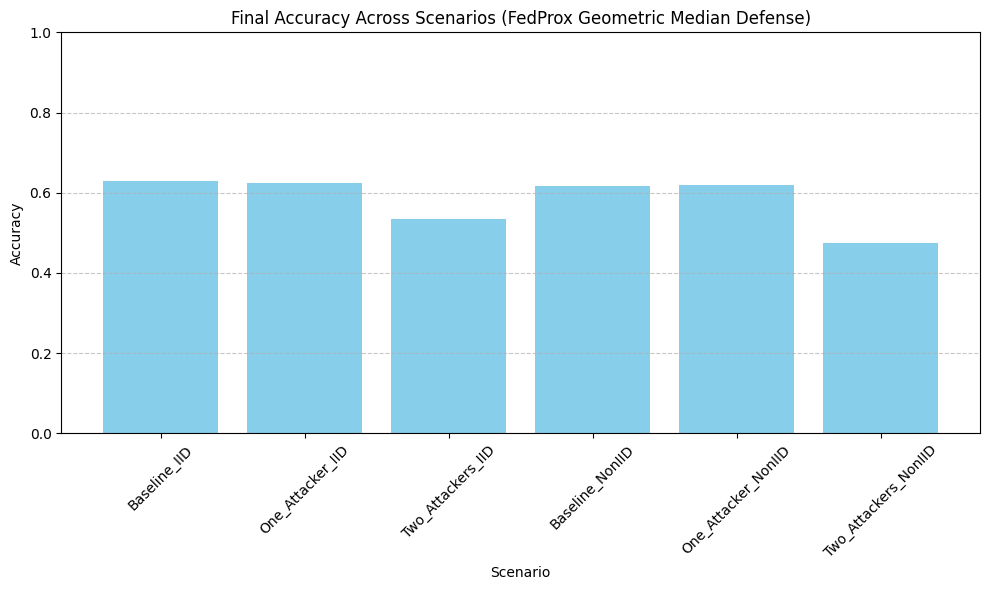

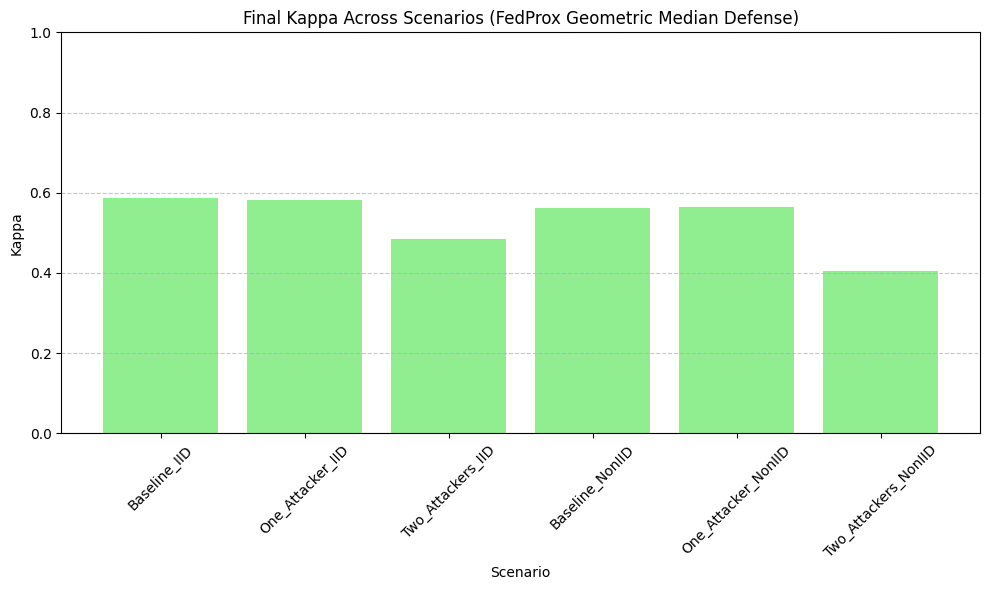

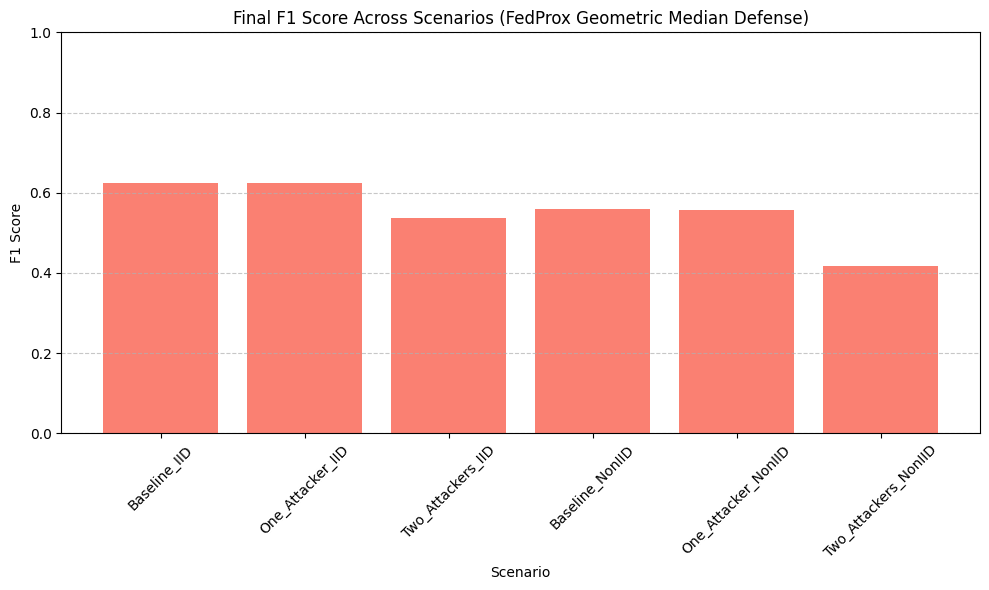

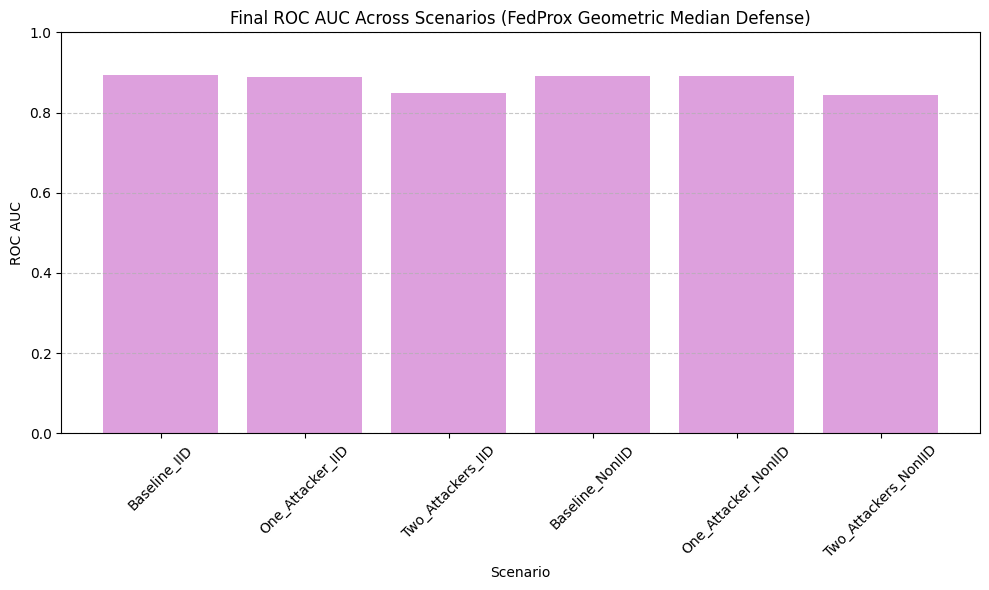

In [10]:
# Plot bar charts to compare final metrics across scenarios

metrics = ['Accuracy', 'Kappa', 'F1 Score', 'ROC AUC']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

for metric, color in zip(metrics, colors):
    plt.figure(figsize=(10, 6))
    plt.bar(summary_df['Scenario'], summary_df[metric], color=color)
    plt.title(f'Final {metric} Across Scenarios (FedProx Geometric Median Defense)')
    plt.xlabel('Scenario')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### Comparison Between FedProx and FedProx with geometric median defense

In [13]:
# Load FedAvg and FedProx metrics datasets
fedprox_geometric_median_defense_path = 'FedProx_Geometric_Median_Defense_combined_metrics.csv'
fedprox_path = 'FedProx_combined_metrics.csv'

fedprox_geometric_median_defense_data = pd.read_csv(fedprox_geometric_median_defense_path)
fedprox_data = pd.read_csv(fedprox_path)

# Display the first few rows to confirm loading
print("FedProx Geometric Median Defense Data Preview:")
display(fedprox_geometric_median_defense_data.head())

print("\nFedProx Data Preview:")
display(fedprox_data.head())


FedProx Geometric Median Defense Data Preview:


,rounds,accuracy,kappa,f1_score,roc_auc,Scenario
0,1,0.3102,0.235488,0.290791,0.780331,Baseline_IID
1,2,0.4100,0.344070,0.392321,0.817039,Baseline_IID
2,3,0.4344,0.371381,0.427692,0.828247,Baseline_IID
3,4,0.4478,0.386558,0.434273,0.837438,Baseline_IID
4,5,0.4744,0.415536,0.467597,0.843977,Baseline_IID



FedProx Data Preview:


,rounds,accuracy,kappa,f1_score,roc_auc,Scenario
0,1,0.3020,0.223918,0.264342,0.782459,Baseline_IID
1,2,0.4096,0.343680,0.394163,0.816175,Baseline_IID
2,3,0.4198,0.354612,0.394079,0.825152,Baseline_IID
3,4,0.4450,0.383190,0.436848,0.837099,Baseline_IID
4,5,0.4690,0.409857,0.454030,0.847767,Baseline_IID


In [14]:
# Define unique scenarios and metrics
scenarios = fedprox_geometric_median_defense_data['Scenario'].unique()
metrics = ['accuracy', 'kappa', 'f1_score', 'roc_auc']


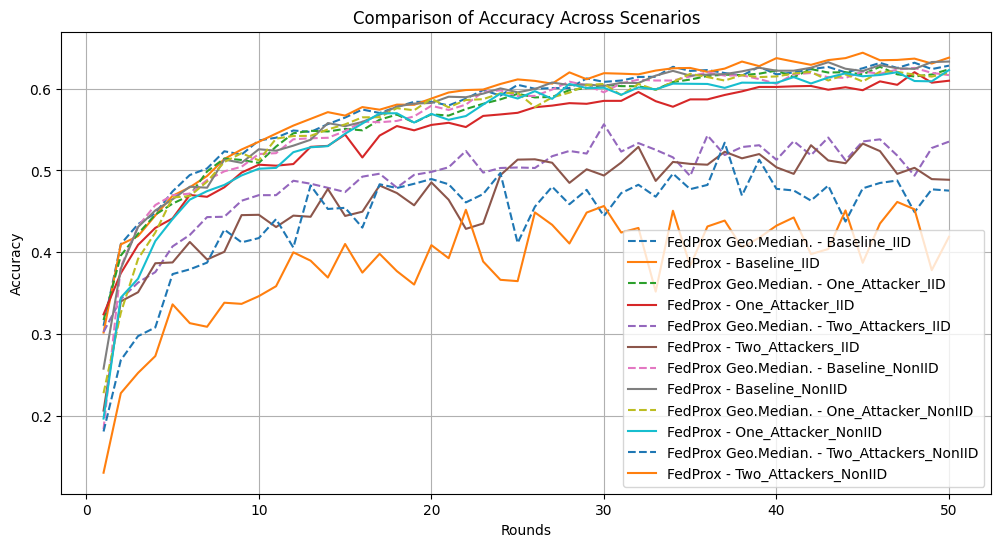

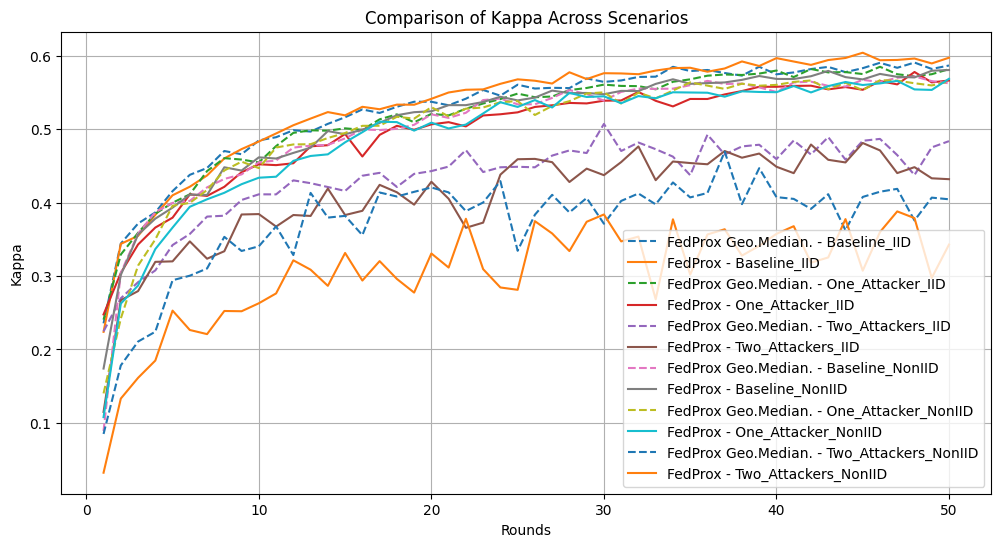

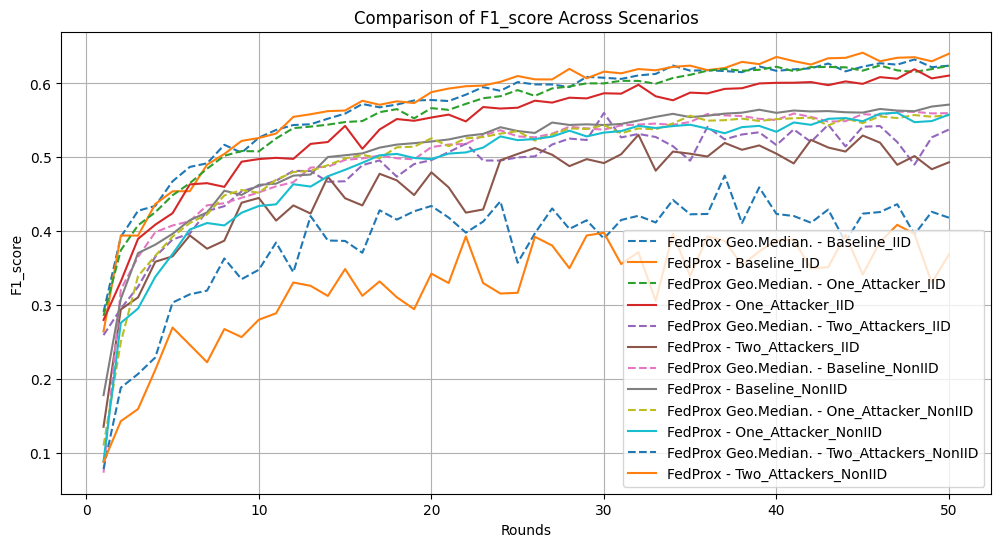

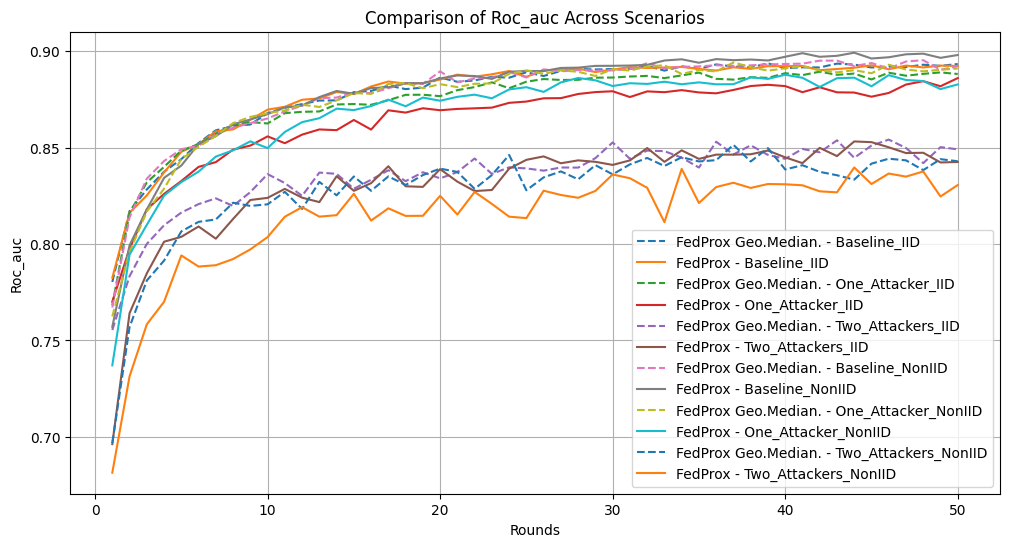

In [ ]:
# Plot comparison for each metric
for metric in metrics:
    plt.figure(figsize=(12, 6))
    for scenario in scenarios:
        # Filter data for each scenario
        fedprox_geometric_median_defense_scenario = fedprox_geometric_median_defense_data[fedprox_geometric_median_defense_data['Scenario'] == scenario]
        fedprox_scenario = fedprox_data[fedprox_data['Scenario'] == scenario]
        
        # Plot FedAvg and FedProx metrics for the scenario
        plt.plot(fedprox_geometric_median_defense_scenario['rounds'], fedprox_geometric_median_defense_scenario[metric], label=f'FedProx Geo. Median. - {scenario}', linestyle='--')
        plt.plot(fedprox_scenario['rounds'], fedprox_scenario[metric], label=f'FedProx - {scenario}')
    
    plt.title(f'Comparison of {metric.capitalize()} Across Scenarios')
    plt.xlabel('Rounds')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()


In [17]:
# Group data by scenario and compute the mean for each metric
fedavg_summary = fedprox_geometric_median_defense_data.groupby('Scenario').mean()[metrics]
fedprox_summary = fedprox_data.groupby('Scenario').mean()[metrics]

# Combine summaries for comparison
comparison_summary = pd.concat([fedavg_summary, fedprox_summary], keys=['FedProx Geo. Median', 'FedProx'], axis=1)

# Display the comparison summary
print("FedAvg vs. FedProx Summary:")
display(comparison_summary)


FedAvg vs. FedProx Summary:


FedProx Geo. Median                                \
                                accuracy     kappa  f1_score   roc_auc   
Scenario                                                                 
Baseline_IID                    0.574500  0.527005  0.569967  0.878149   
Baseline_NonIID                 0.563262  0.503385  0.500671  0.878480   
One_Attacker_IID                0.565336  0.516964  0.561755  0.874265   
One_Attacker_NonIID             0.562027  0.501667  0.498513  0.876119   
Two_Attackers_IID               0.490356  0.433898  0.485674  0.835875   
Two_Attackers_NonIID            0.445457  0.372284  0.384588  0.828473   

                       FedProx                                
                      accuracy     kappa  f1_score   roc_auc  
Scenario                                                      
Baseline_IID          0.579408  0.532449  0.574248  0.878523  
Baseline_NonIID       0.569838  0.510622  0.508314  0.879240  
One_Attacker_IID      0.548388  0.498186  0.543253  0.865144  
One_Attacker_NonIID   0.553856  0.492379  0.488061  0.868310  
Two_Attackers_IID     0.467732  0.408625  0.459053  0.830925  
Two_Attackers_NonIID  0.385409  0.305296  0.326513  0.814324

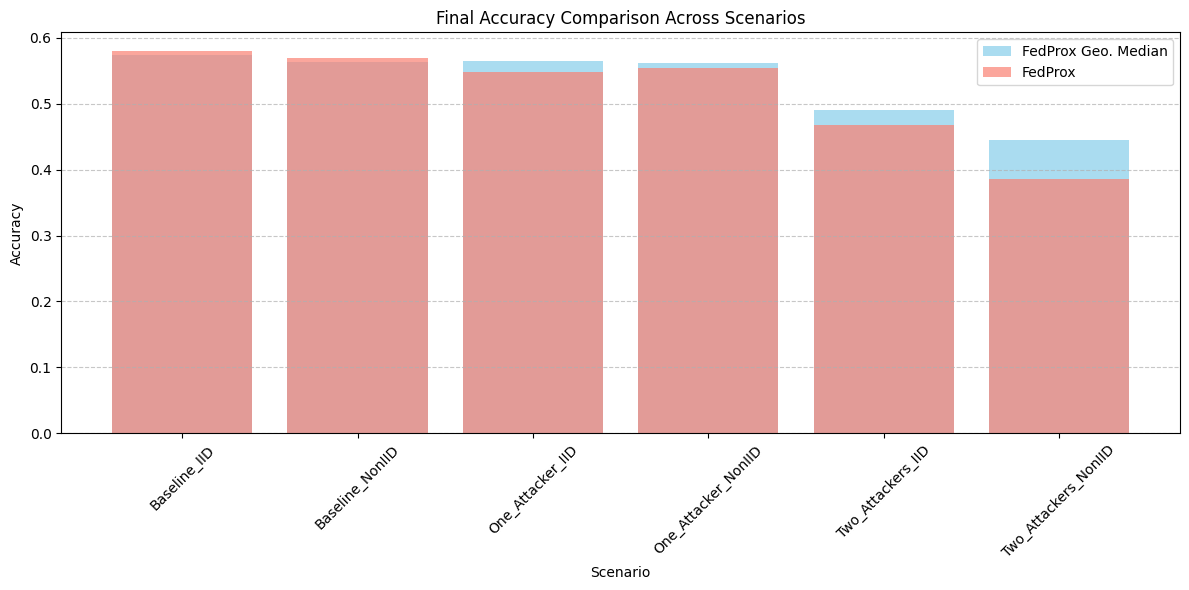

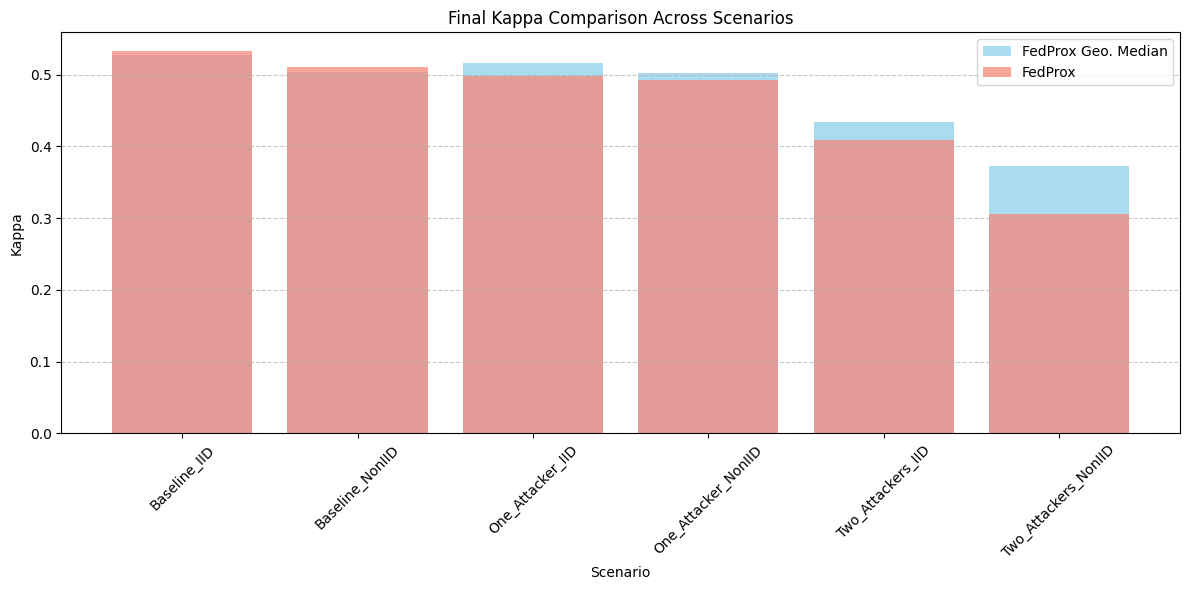

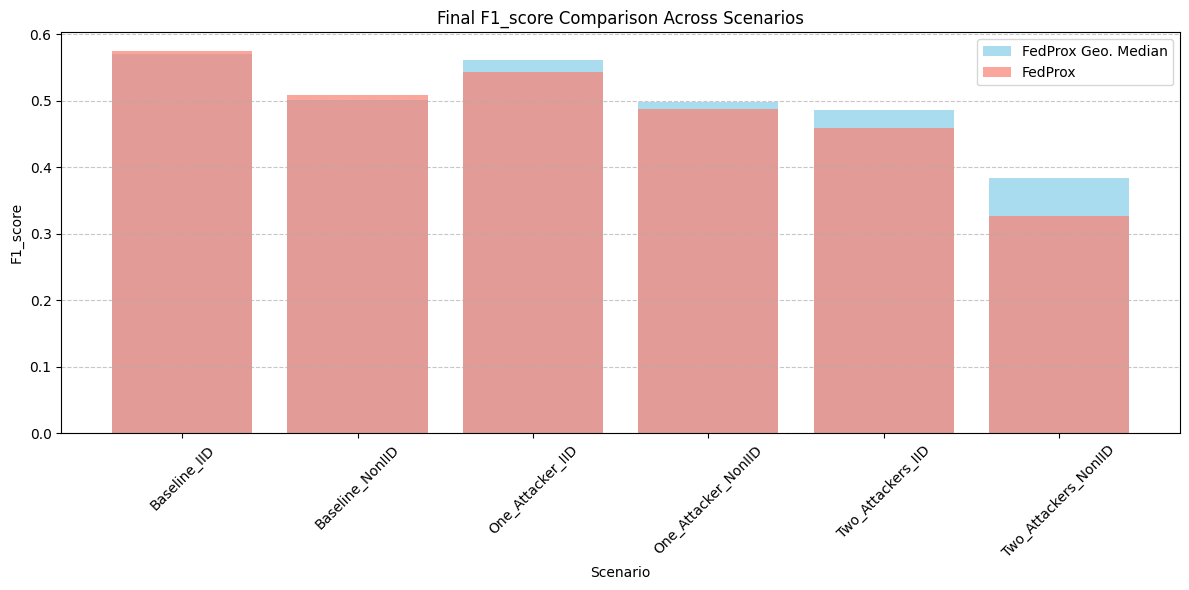

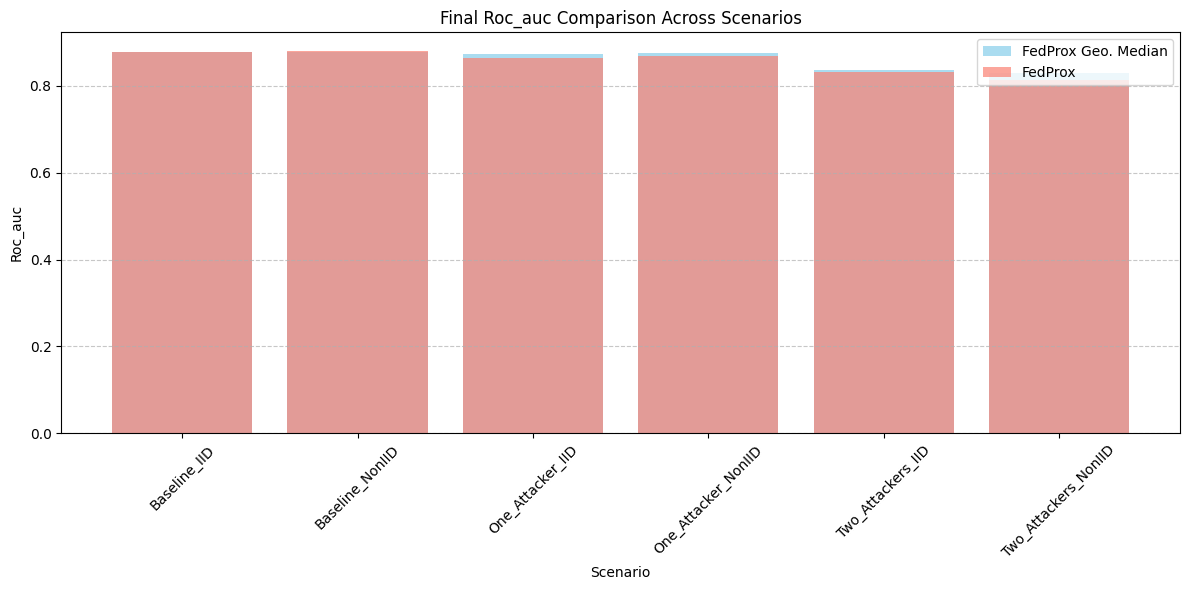

In [18]:
# Plot bar charts for final metrics across scenarios
metrics = ['accuracy', 'kappa', 'f1_score', 'roc_auc']
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

for metric, color in zip(metrics, colors):
    plt.figure(figsize=(12, 6))
    plt.bar(comparison_summary.index, comparison_summary[('FedProx Geo. Median', metric)], label='FedProx Geo. Median', color='skyblue', alpha=0.7)
    plt.bar(comparison_summary.index, comparison_summary[('FedProx', metric)], label='FedProx', color='salmon', alpha=0.7)
    plt.title(f'Final {metric.capitalize()} Comparison Across Scenarios')
    plt.xlabel('Scenario')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
metrics = ['accuracy', 'kappa', 'f1_score', 'roc_auc']

# Filter for the final round(s)
final_round = fedprox_geometric_median_defense_data['rounds'].max()
fedavg_final = fedprox_geometric_median_defense_data[fedprox_geometric_median_defense_data['rounds'] == final_round]
fedprox_final = fedprox_data[fedprox_data['rounds'] == final_round]

# Calculate mean metrics for the final round for FedAvg and FedProx
fedavg_mean_final = fedavg_final.groupby('Scenario').mean()[metrics]
fedprox_mean_final = fedprox_final.groupby('Scenario').mean()[metrics]

# Calculate percentage improvement for the final round
improvement_final = (fedprox_mean_final - fedavg_mean_final) / fedavg_mean_final * 100

# Find the most interesting values: maximum improvement per metric
most_interesting_values_final = improvement_final.idxmax()  # Scenarios with the highest improvement per metric
most_interesting_results_final = improvement_final.max()    # Maximum improvement values per metric

# Combine into a summary DataFrame
interesting_summary_final = pd.DataFrame({
    "Metric": metrics,
    "Best Scenario": most_interesting_values_final.values,
    "Improvement (%)": most_interesting_results_final.values
})

# Display the most interesting results for the final round
print("Most Interesting Results for the Final Round:")
print(interesting_summary_final)


Most Interesting Results for the Final Round:
     Metric    Best Scenario  Improvement (%)
0  accuracy  Baseline_NonIID         2.691310
1     kappa  Baseline_NonIID         3.214048
2  f1_score     Baseline_IID         2.600309
3   roc_auc  Baseline_NonIID         0.658556


In [21]:
# Define metrics and scenarios of interest
metrics = ['accuracy', 'kappa', 'f1_score', 'roc_auc']
scenarios_of_interest = ['One_Attacker_IID', 'One_Attacker_NonIID', 
                          'Two_Attackers_IID', 'Two_Attackers_NonIID']

# Filter for the final round(s) and the scenarios of interest
final_round = fedprox_geometric_median_defense_data['rounds'].max()
fedprox_geometric_median_final = fedprox_geometric_median_defense_data[
    (fedprox_geometric_median_defense_data['rounds'] == final_round) & 
    (fedprox_geometric_median_defense_data['Scenario'].isin(scenarios_of_interest))
]
fedprox_final = fedprox_data[
    (fedprox_data['rounds'] == final_round) & 
    (fedprox_data['Scenario'].isin(scenarios_of_interest))
]

# Calculate mean metrics for the final round for selected scenarios
fedprox_mean_final = fedprox_final.groupby('Scenario').mean()[metrics]
fedprox_geometric_median_mean_final = fedprox_geometric_median_final.groupby('Scenario').mean()[metrics]

# Calculate percentage improvement for selected scenarios in the final round
improvement_final = (fedprox_geometric_median_mean_final - fedprox_mean_final) / fedprox_mean_final * 100

# Combine into a summary DataFrame
comparison_summary = pd.concat([
    fedprox_mean_final, 
    fedprox_geometric_median_mean_final, 
    improvement_final
], keys=['FedProx Final Mean', 'FedProx + Geometric Median Final Mean', 'Improvement (%)'], axis=1)

# Display the comparison summary for selected scenarios
print("Comparison Summary: FedProx vs. FedProx + Geometric Median Defense (Final Round)")
print(comparison_summary)


Comparison Summary: FedProx vs. FedProx + Geometric Median Defense (Final Round)
                     FedProx Final Mean                                \
                               accuracy     kappa  f1_score   roc_auc   
Scenario                                                                
One_Attacker_IID               0.609600  0.566124  0.610622  0.885965   
One_Attacker_NonIID            0.622626  0.568464  0.557822  0.882694   
Two_Attackers_IID              0.488600  0.431775  0.493303  0.842498   
Two_Attackers_NonIID           0.418949  0.342751  0.368817  0.830560   

                     FedProx + Geometric Median Final Mean            \
                                                  accuracy     kappa   
Scenario                                                               
One_Attacker_IID                                  0.623600  0.581626   
One_Attacker_NonIID                               0.619228  0.564845   
Two_Attackers_IID                              

### **Conclusions: Geometric Median Defense Performance**

#### **1. Overall Performance vs. Baseline FedProx**
The Geometric Median Defense demonstrates strong resilience against adversarial attacks, especially in **multi-attacker Non-IID** scenarios. However, its performance varies across conditions:

- **Significant Gains**:
  - In the **Two_Attackers_NonIID** scenario, the defense achieved the highest improvements:
    - **Accuracy**: +13.45%
    - **Kappa**: +17.99%
    - **F1 Score**: +13.41%
    - **ROC AUC**: +1.48%
  - These results indicate that the defense effectively manages diverse, adversarial data distributions.

- **Moderate Improvements**:
  - In **One_Attacker_IID** and **Two_Attackers_IID** scenarios, the defense improved key metrics, particularly:
    - **Accuracy**: +2.30% and +9.54%, respectively.
    - **Kappa**: +2.74% and +12.00%, respectively.

- **Minor Regression**:
  - In the **One_Attacker_NonIID** scenario, there was a slight drop in:
    - **Accuracy**: -0.55%
    - **Kappa**: -0.64%
  - This indicates that single-adversary attacks in heterogeneous settings may require additional refinements.

---

#### **2. Metric-Specific Observations**
- **Accuracy**:
  - Largest improvement in **Two_Attackers_NonIID** (+13.45%), highlighting the defense's ability to mitigate adversarial impacts in complex settings.
  - Smaller but consistent improvements in IID scenarios.

- **Kappa**:
  - Exceptional gains in **Two_Attackers_NonIID** (+17.99%), showcasing increased agreement between predictions and ground truth.

- **F1 Score**:
  - Significant gains in **multi-attacker scenarios**, indicating better handling of class imbalances.

- **ROC AUC**:
  - Modest improvements overall, with the largest gain in **Two_Attackers_NonIID** (+1.48%).

---

#### **3. Recommendations**
1. **Use Cases**:
   - Employ the Geometric Median Defense in **multi-attacker Non-IID scenarios**, where it shows the most significant gains in all key metrics.
   - For IID datasets, the defense provides consistent and moderate improvements, making it a reliable choice.

2. **Enhancements**:
   - Investigate hybrid defenses combining geometric median aggregation with other techniques (e.g., anomaly detection) for better performance in single-attacker Non-IID cases.
   - Optimize parameters to maximize gains in **ROC AUC**, especially for Non-IID settings.

3. **Future Directions**:
   - Explore scaling the defense for larger federated networks.
   - Assess the performance of the geometric median defense with different types of adversarial behaviors beyond label flipping.

---

The Geometric Median Defense emerges as a robust tool for enhancing federated learning robustness, particularly in complex adversarial environments with heterogeneous data distributions.
